# Getting Started with Open Datacube

This notebook describe:

1. How to query the datacube
2. How to plot data of every image band
3. How to save and read a Netcdf file.
4. Hot to save into a geotif (this require a 2 dimention image), probably you have to remove the time dimention.

In [1]:
# Display the matplotlib plots in the notebook
%matplotlib inline

# Supress the warning in a notebook so that they 
# are not displayed when running cells.
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore')

import numpy as np
np.seterr('ignore')

# Common imports
from algorithms.common import save_netcdf, read_netcdf, save_geotiff
import xarray as xr
import datacube

## Query the datacube

In [2]:
dc = datacube.Datacube(app="Query")

xarr = dc.load(
    product="LS8_OLI_LASRC",
    latitude=(3,4),
    longitude=(-70, -69), 
    # Time format YYYY-MM-DD
    time=("2018-01-01","2018-12-31"), 
    measurements=['blue','green','red']
)

xarr

<xarray.Dataset>
Dimensions:    (latitude: 3687, longitude: 3705, time: 1)
Coordinates:
  * time       (time) datetime64[ns] 2018-12-25T14:54:05
  * latitude   (latitude) float64 4.0 4.0 3.999 3.999 3.999 3.999 3.998 ...
  * longitude  (longitude) float64 -70.0 -70.0 -70.0 -70.0 -70.0 -70.0 -70.0 ...
Data variables:
    blue       (time, latitude, longitude) int16 3980 3843 3547 3359 2958 ...
    green      (time, latitude, longitude) int16 3863 3475 3331 3182 2861 ...
    red        (time, latitude, longitude) int16 3927 3492 3296 3146 2841 ...
Attributes:
    crs:      EPSG:4326

## Plot a single band data

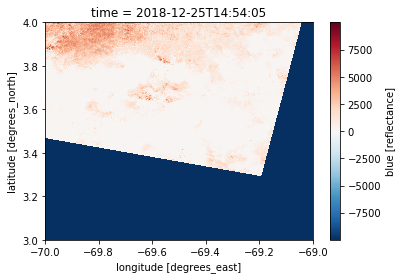

In [3]:
xarr.blue.plot()

## Save dataset into a netcdf and read

In [4]:
save_netcdf(xarr,'data.nc')

/usr/local/lib/python3.6/dist-packages/datacube/utils/__init__.py:223: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(res), numpy.asscalar(off)
/usr/local/lib/python3.6/dist-packages/datacube/utils/__init__.py:223: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(res), numpy.asscalar(off)
/usr/local/lib/python3.6/dist-packages/datacube/utils/__init__.py:223: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(res), numpy.asscalar(off)
/usr/local/lib/python3.6/dist-packages/datacube/utils/__init__.py:223: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(res), numpy.asscalar(off)


In [5]:
read_netcdf('data.nc')

<xarray.Dataset>
Dimensions:    (latitude: 3687, longitude: 3705, time: 1)
Coordinates:
  * time       (time) datetime64[ns] 2018-12-25T14:54:05
  * latitude   (latitude) float64 4.0 4.0 3.999 3.999 3.999 3.999 3.998 ...
  * longitude  (longitude) float64 -70.0 -70.0 -70.0 -70.0 -70.0 -70.0 -70.0 ...
Data variables:
    blue       (time, latitude, longitude) float32 ...
    green      (time, latitude, longitude) float32 ...
    red        (time, latitude, longitude) float32 ...
Attributes:
    date_created:           2019-09-22T23:21:54.048254
    Conventions:            CF-1.6, ACDD-1.3
    history:                no history
    geospatial_bounds:      POLYGON ((-70.000253675 4.000076688,-70.000253675...
    geospatial_bounds_crs:  EPSG:4326
    geospatial_lat_min:     2.9997862140000002
    geospatial_lat_max:     4.000076688
    geospatial_lat_units:   degrees_north
    geospatial_lon_min:     -70.000253675
    geospatial_lon_max:     -68.9999222
    geospatial_lon_units:   degrees_

## Save into a geotiff

In [8]:
# As every data array (band) has 3 dimentions, we remove the time 
# dimention so it can be saved into the netcdf
# this works only when the dataset has 1 slice of time.
for band in xarr.data_vars.keys():
    xarr[band] = np.squeeze(xarr[band],0)
save_geotiff(xarr,'xarr10.tif')

/usr/local/lib/python3.6/dist-packages/datacube/utils/__init__.py:223: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(res), numpy.asscalar(off)
/usr/local/lib/python3.6/dist-packages/datacube/utils/__init__.py:223: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(res), numpy.asscalar(off)
/usr/local/lib/python3.6/dist-packages/datacube/utils/__init__.py:223: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(res), numpy.asscalar(off)
/usr/local/lib/python3.6/dist-packages/datacube/utils/__init__.py:223: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(res), numpy.asscalar(off)
/usr/local/lib/python3.6/dist-packages/datacube/utils/__init__.py:223: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
